In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [45]:
# global params
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
# normalize train data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [47]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [50]:
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 6.1895 - accuracy: 0.1232 - val_loss: 6.2030 - val_accuracy: 0.1316
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 6.1672 - accuracy: 0.1221 - val_loss: 6.2109 - val_accuracy: 0.1306
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 6.1752 - accuracy: 0.1214 - val_loss: 6.1939 - val_accuracy: 0.1305
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 6.1937 - accuracy: 0.1212 - val_loss: 6.2064 - val_accuracy: 0.1298
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 6.1923 - accuracy: 0.1206 - val_loss: 6.2177 - val_accuracy: 0.1294
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 6.1984 - accuracy: 0.1204 - val_loss: 6.2203 - val_accuracy: 0.1291
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 6.2074 - accuracy: 0.1205 - val_loss: 6.2912 - val_accuracy: 0.1286
Epoch 

In [51]:
test_history = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_history[0])
print('Test accuracy:', test_history[1])

Test loss: 6.38574743270874
Test accuracy: 0.1273999959230423


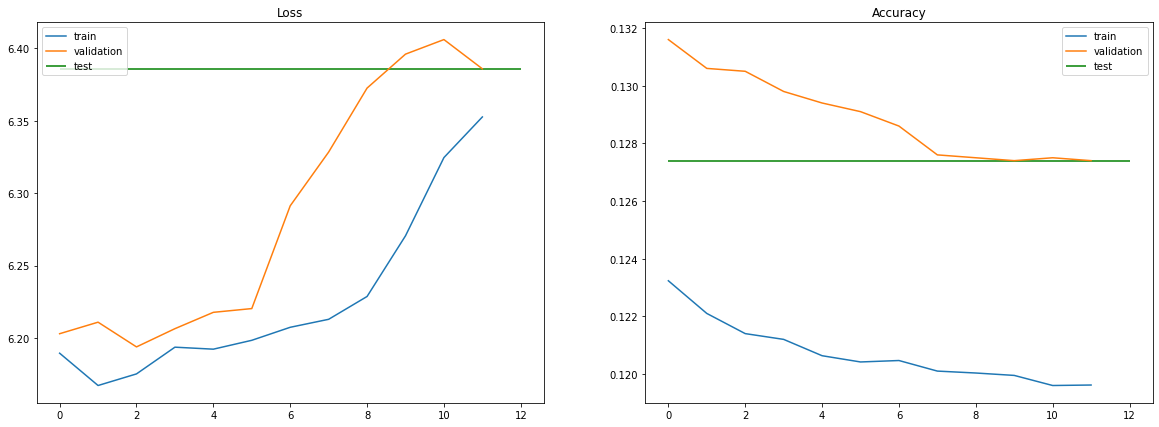

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

ax[0].plot(train_history.history["loss"], label="train")
ax[0].plot(train_history.history["val_loss"], label="validation")
ax[0].hlines(
    y=test_history[0],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[0].legend(loc=0)
ax[0].set_title("Loss")

ax[1].plot(train_history.history["accuracy"], label="train")
ax[1].plot(train_history.history["val_accuracy"], label="validation")
ax[1].hlines(
    y=test_history[1],
    xmin=0,
    xmax=len(train_history.history["loss"]),
    colors="green",
    label="test"
)
ax[1].legend(loc=0)
ax[1].set_title("Accuracy")

plt.show()